In [1]:
import os
import pandas as pd
import numpy as np
from os.path import exists as path_exists
import matplotlib.pyplot as plt

TMP_FOLDER = './tmp/'
DATA_FILE_ENGLISH = TMP_FOLDER + 'masterfilelist.txt'
DATA_FILE_TRANSLATION = TMP_FOLDER + 'masterfilelist-translation.txt'

if not path_exists(TMP_FOLDER):
    os.makedirs(TMP_FOLDER)
    
%matplotlib inline

In [2]:
# fetch the data requiered for the analysis
if not path_exists(DATA_FILE_ENGLISH):
    !wget --directory-prefix tmp http://data.gdeltproject.org/gdeltv2/masterfilelist.txt
        
if not path_exists(DATA_FILE_TRANSLATION):
    !wget --directory-prefix tmp http://data.gdeltproject.org/gdeltv2/masterfilelist-translation.txt

In [3]:
data_english = pd.read_csv(DATA_FILE_ENGLISH, 
                   sep=' ', 
                   header=None, 
                   names=['Size', 'Hash', 'Url'],
                   dtype={'Size': str})

data_translations = pd.read_csv(DATA_FILE_TRANSLATION, 
                               sep=' ', 
                               header=None, 
                               names=['Size', 'Hash', 'Url'],
                               dtype={'Size': str})

In [4]:
def analysis(data):
    # Parsing fails sometimes
    d = data[~data.Size.str.contains('http:')]

    # casting correct types
    d.Size = d.Size.astype(int)
    mentions = d[d.Url.str.contains('mentions', na=False)]
    events = d[d.Url.str.contains('export', na=False)]
    
    q = np.arange(0, 1.01, 0.01)
    plt.plot(q, (mentions.Size.quantile(q) + events.Size.quantile(q))/1000)
    plt.yscale('log')
    plt.xlabel('quantile')
    plt.ylabel('size in Kbytes')

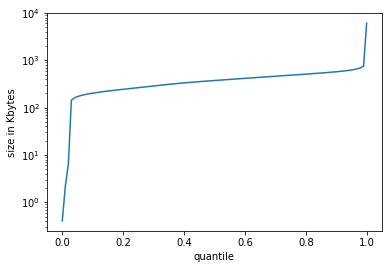

In [7]:
analysis(data_english)

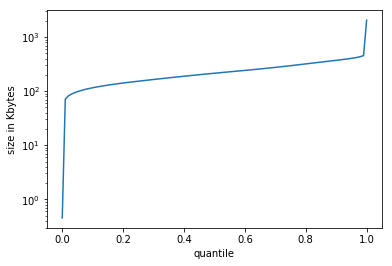

In [6]:
analysis(data_translations)